<a href="https://colab.research.google.com/github/ARPRAHMAN/AI_Problems/blob/AI/AI_W7_6168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Minimax Algorithm**


Core function
*   min(currentdepth+1, nodeIndex*2, score, nodeIndex)
*   max(currentdepth+1, nodeIndex*2, score, nodeIndex)


*   Decleare log base 2 cz binary leaf node
*   All min scaler are in math operation





In [4]:
import math
# min max function to determine the optimal value
def minimax(curDepth, nodeIndex, maxTurn, scores, targetDepth):
  #base case: if target depth is reached , return the leaf node
  if (curDepth == targetDepth):
    return scores[nodeIndex]

  #if it's max turn choose the maximum value between the two childern
  if (maxTurn):
    return max(minimax(curDepth +1, nodeIndex *2, False,scores,targetDepth),
               minimax(curDepth +1, nodeIndex *2 +1, False,scores,targetDepth))
  else:
    return min(minimax(curDepth +1, nodeIndex *2, True,scores,targetDepth),
               minimax(curDepth +1, nodeIndex *2 +1, True,scores,targetDepth))


In [7]:
  #Driver code
  scores = [3,5,2,9,12,5,23,23]
  treeDepth = int(math.log2(len(scores)))


  #start the minimax algorithm from the root
  print("The optimal value is: ", end = "")
  print(minimax(0,0,True,scores,treeDepth))

The optimal value is: 12


# **Alpha Beta Purning**

*   alpha= MIN = -1000
*   beta= MAX = 1000

1.   alpha >= beta then break;
2.   Working procedure : where alpha pick only max . beta pick only min






In [10]:
MAX, MIN = 1000, -1000

def minmax(depth, nodeindex, maximizingPlayer, values, alpha, beta):
    # If we reach leaf node (depth 3), return the score
    if depth == 3:
        return values[nodeindex]

    # Maximizer's move
    if maximizingPlayer:
        best = MIN
        for i in range(2):
            val = minmax(depth + 1, nodeindex * 2 + i, False, scores, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)

            # Alpha-Beta Pruning
            if beta <= alpha:
                break
        return best

    # Minimizer's move
    else:
        best = MAX
        for i in range(2):
            val = minmax(depth + 1, nodeindex * 2 + i, True, scores, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)

            # Alpha-Beta Pruning
            if beta <= alpha:
                break
        return best

# Driver code
scores = [3, 5, 6, 9, 1, 2, 0, -1]
alpha = MIN
beta = MAX

print("The optimal value is:",
      minmax(0, 0, True, scores, alpha, beta))


The optimal value is: 5


Creating Pretrained **ChatBot** where are some features:


*   List item
*   List item



In [12]:
!pip install transformers

from transformers import AutoModelForCausalLM, AutoTokenizer

# Load a pretrained conversational model
model_name = "microsoft/DialoGPT-small"

print("Loading model, please wait...")

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print("Chat with the bot! Type 'exit' to end the chat.\n")

chat_history_ids = None

while True:
    user_input = input("You: ")

    if user_input.lower() == "exit":
        print("Goodbye!")
        break

    # Encode user input
    new_input_ids = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors="pt")

    # Append history if exists
    if chat_history_ids is not None:
        bot_input_ids = tokenizer.build_inputs_with_special_tokens(
            torch.cat([chat_history_ids, new_input_ids], dim=-1)
        )
    else:
        bot_input_ids = new_input_ids

    # Generate response
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        do_sample=True,
        top_p=0.95,
        top_k=50,
        pad_token_id=tokenizer.eos_token_id
    )

    # Decode & print response
    response = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    print("Bot:", response)


Loading model, please wait...


tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Chat with the bot! Type 'exit' to end the chat.

You: hi How are you?


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Bot: hi D I think you're my brother
You: exit
Goodbye!


Apply alpha beta pruning and find the best solution of the fiven informnation implementing csv file on priority pass show the visual graph with full information:

Priority pass: [3,5,6,9,1,2,0,-1]
Facilities; [techno:beauty, techno: food, techno;food:loyality card, Techno; chemi-expo, Entry card, stall-visit, no pass, penalty card]

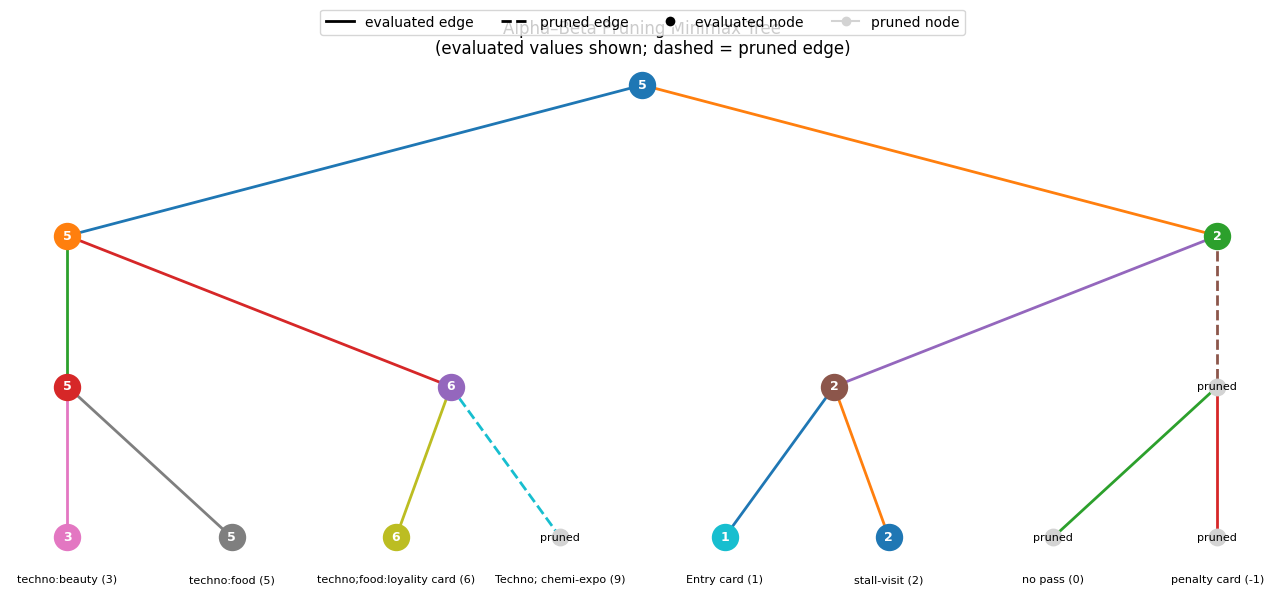

CSV saved to: priority_pass.csv
Plot saved to: alpha_beta_tree.png
Leaf values: [3, 5, 6, 9, 1, 2, 0, -1]
Facilities mapping (index -> facility):
  0: techno:beauty  (3)
  1: techno:food  (5)
  2: techno;food:loyality card  (6)
  3: Techno; chemi-expo  (9)
  4: Entry card  (1)
  5: stall-visit  (2)
  6: no pass  (0)
  7: penalty card  (-1)

Minimax (alpha-beta) results:
  Optimal value: 5
  Leaf nodes visited (in order): [0, 1, 2, 4, 5]
  Number of leaf evaluations: 5
  Number of pruned branches: 2
  Pruned edges (parent -> skipped child):
     (2, 1) -> (3, 3)
     (1, 1) -> (2, 3)


In [14]:
"""
Alpha-Beta Minimax with CSV export and tree visualization.

- Replace `leaf_values` and `facilities` if you want different data.
- Requires: pandas, matplotlib
    pip install pandas matplotlib
"""

import math
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# Input data (from you)
# -------------------------
leaf_values = [3, 5, 6, 9, 1, 2, 0, -1]
facilities = [
    "techno:beauty",
    "techno:food",
    "techno;food:loyality card",
    "Techno; chemi-expo",
    "Entry card",
    "stall-visit",
    "no pass",
    "penalty card"
]

# Validate lengths
if len(leaf_values) != len(facilities):
    raise ValueError("leaf_values and facilities must be the same length")

if (len(leaf_values) & (len(leaf_values) - 1)) != 0:
    raise ValueError("Number of leaves must be a power of two for this perfect binary tree implementation")

# -------------------------
# Save CSV mapping
# -------------------------
df = pd.DataFrame({
    "leaf_index": list(range(len(leaf_values))),
    "facility": facilities,
    "priority_pass_value": leaf_values
})
csv_path = "priority_pass.csv"
df.to_csv(csv_path, index=False)

# -------------------------
# Alpha-Beta Minimax impl
# -------------------------
MAX = float("inf")
MIN = float("-inf")

# For instrumentation
evaluated_nodes = {}   # maps (depth, nodeIndex) -> value (nodes actually computed)
visited_leaves = []    # order of leaf indices evaluated
pruned_edges = []      # list of (parent_node, child_node) edges that were pruned

def minimax_ab(depth, node_index, maximizing_player, alpha, beta, target_depth, parent=None):
    """
    Returns minimax value for node (depth,node_index).
    Logs evaluated nodes, visited leaves and pruned edges.
    Node keys are tuples: (depth, node_index)
    """
    node_key = (depth, node_index)

    # Leaf case
    if depth == target_depth:
        val = leaf_values[node_index]
        evaluated_nodes[node_key] = val
        visited_leaves.append(node_index)
        return val

    if maximizing_player:
        best = MIN
        for i in range(2):  # left (0), right (1)
            child_key = (depth + 1, node_index * 2 + i)
            val = minimax_ab(depth + 1, node_index * 2 + i, False, alpha, beta, target_depth, node_key)
            # record child's computed value (child may have been evaluated earlier)
            evaluated_nodes[child_key] = evaluated_nodes.get(child_key, val)
            if val > best:
                best = val
            alpha = max(alpha, best)
            # pruning: if beta <= alpha -> skip remaining siblings
            if beta <= alpha:
                # if we just computed left child (i == 0), then right child (i==1) is pruned
                if i == 0:
                    skipped_child = (depth + 1, node_index * 2 + 1)
                    pruned_edges.append((node_key, skipped_child))
                break
        evaluated_nodes[node_key] = best
        return best
    else:
        best = MAX
        for i in range(2):
            child_key = (depth + 1, node_index * 2 + i)
            val = minimax_ab(depth + 1, node_index * 2 + i, True, alpha, beta, target_depth, node_key)
            evaluated_nodes[child_key] = evaluated_nodes.get(child_key, val)
            if val < best:
                best = val
            beta = min(beta, best)
            if beta <= alpha:
                if i == 0:
                    skipped_child = (depth + 1, node_index * 2 + 1)
                    pruned_edges.append((node_key, skipped_child))
                break
        evaluated_nodes[node_key] = best
        return best

# Run minimax
target_depth = int(math.log2(len(leaf_values)))
optimal_value = minimax_ab(0, 0, True, MIN, MAX, target_depth)

# -------------------------
# Build tree nodes & positions for plotting
# -------------------------
nodes = []
for d in range(target_depth + 1):
    for idx in range(2**d):
        nodes.append((d, idx))

# Compute positions: evenly spaced x within each level, y = -depth
positions = {}
for d in range(target_depth + 1):
    level_count = 2**d
    if level_count == 1:
        xs = [0.5]
    else:
        xs = [i / (level_count - 1) for i in range(level_count)]
    ys = [-d] * level_count
    for i, x in enumerate(xs):
        positions[(d, i)] = (x, ys[i])

# -------------------------
# Plot the tree
# -------------------------
plt.figure(figsize=(13, 6))
ax = plt.gca()
ax.set_title("Alpha–Beta Pruning Minimax Tree\n(evaluated values shown; dashed = pruned edge)")
ax.axis('off')

# Draw edges (solid if child evaluated, dashed if pruned)
for d in range(target_depth):
    for idx in range(2**d):
        parent = (d, idx)
        left = (d + 1, idx*2)
        right = (d + 1, idx*2 + 1)

        # left edge
        x_vals = [positions[parent][0], positions[left][0]]
        y_vals = [positions[parent][1], positions[left][1]]
        if (parent, left) in pruned_edges:
            ax.plot(x_vals, y_vals, linestyle='--', linewidth=2)
        else:
            ax.plot(x_vals, y_vals, linewidth=2)

        # right edge
        x_vals = [positions[parent][0], positions[right][0]]
        y_vals = [positions[parent][1], positions[right][1]]
        if (parent, right) in pruned_edges:
            ax.plot(x_vals, y_vals, linestyle='--', linewidth=2)
        else:
            ax.plot(x_vals, y_vals, linewidth=2)

# Draw nodes: colored by whether they were evaluated
for node in nodes:
    x, y = positions[node]
    if node in evaluated_nodes:
        ax.scatter([x], [y], s=350, zorder=3)  # evaluated node
        label = str(evaluated_nodes[node])
        ax.text(x, y, label, va='center', ha='center', color='white', fontsize=9, fontweight='bold')
    else:
        # pruned node: smaller gray marker and label '(pruned)'
        ax.scatter([x], [y], s=140, color='lightgray', zorder=2)
        ax.text(x, y, "pruned", va='center', ha='center', fontsize=8, color='black')

# Annotate leaves with facility names below them
for i in range(len(leaf_values)):
    node = (target_depth, i)
    x, y = positions[node]
    ax.text(x, y - 0.25, f"{facilities[i]} ({leaf_values[i]})", va='top', ha='center', fontsize=8)

# Legend
import matplotlib.lines as mlines
solid = mlines.Line2D([], [], color='black', linewidth=2, label='evaluated edge')
dashed = mlines.Line2D([], [], color='black', linestyle='--', linewidth=2, label='pruned edge')
evalu = plt.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=8, label='evaluated node')
pruned_legend = plt.Line2D([], [], marker='o', color='lightgray', markerfacecolor='lightgray', markersize=6, label='pruned node')
ax.legend(handles=[solid, dashed, evalu, pruned_legend], loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4)

plt.tight_layout()
plot_path = "alpha_beta_tree.png"
plt.savefig(plot_path, dpi=200)
plt.show()

# -------------------------
# Summary output
# -------------------------
print("CSV saved to:", csv_path)
print("Plot saved to:", plot_path)
print("Leaf values:", leaf_values)
print("Facilities mapping (index -> facility):")
for i, f in enumerate(facilities):
    print(f"  {i}: {f}  ({leaf_values[i]})")
print("\nMinimax (alpha-beta) results:")
print("  Optimal value:", optimal_value)
print("  Leaf nodes visited (in order):", visited_leaves)
print("  Number of leaf evaluations:", len(visited_leaves))
print("  Number of pruned branches:", len(pruned_edges))
if pruned_edges:
    print("  Pruned edges (parent -> skipped child):")
    for p, c in pruned_edges:
        print("    ", p, "->", c)

# End of script



Node Values (depth, index → value):
(0, 0) -> 5
(1, 0) -> 5
(1, 1) -> 2
(2, 0) -> 5
(2, 1) -> 6
(2, 2) -> 2
(3, 0) -> 3
(3, 1) -> 5
(3, 2) -> 6
(3, 4) -> 1
(3, 5) -> 2

Optimal Value: 5
Visited leaves: [0, 1, 2, 4, 5]
Pruned leaves: [3, 3]


/tmp/ipython-input-3856740167.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


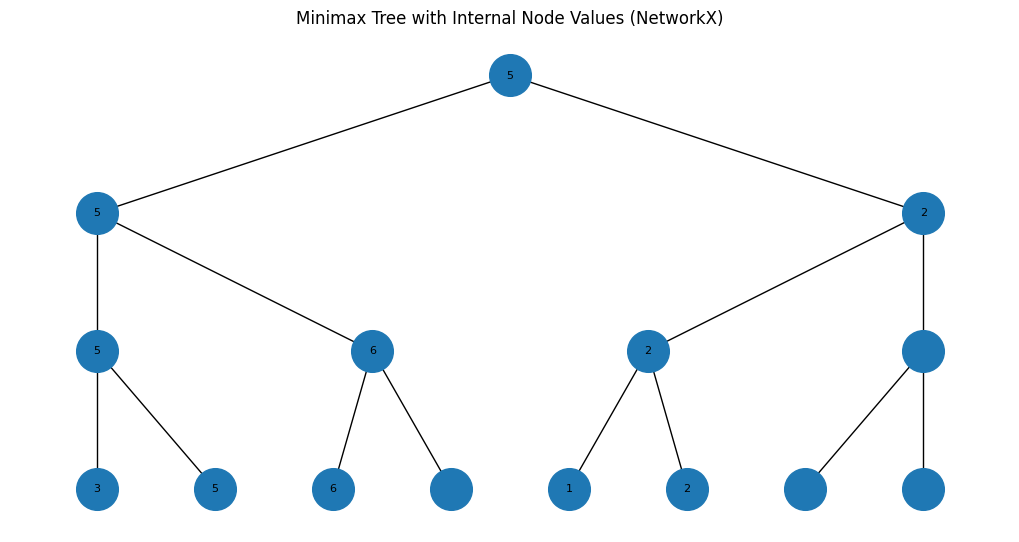

In [24]:
import math
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------------------
# INPUT DATA
# -------------------------------------
leaf_values = [3, 5, 6, 9, 1, 2, 0, -1]
facilities = [
    "techno:beauty",
    "techno:food",
    "techno;food:loyality card",
    "Techno; chemi-expo",
    "Entry card",
    "stall-visit",
    "no pass",
    "penalty card"
]

# -------------------------------------
# ALPHA-BETA MINIMAX (store node values)
# -------------------------------------
INF = float("inf")
node_values = {}   # <-- store internal node values
visited = []
pruned = []

def alphabeta(depth, index, maximizing, alpha, beta, max_depth):
    node_id = (depth, index)

    if depth == max_depth:
        visited.append(index)
        node_values[node_id] = leaf_values[index]
        return leaf_values[index]

    if maximizing:
        best = -INF
        for i in range(2):
            child = index * 2 + i
            value = alphabeta(depth + 1, child, False, alpha, beta, max_depth)
            best = max(best, value)
            alpha = max(alpha, best)
            if beta <= alpha:
                if i == 0:
                    pruned.append(index * 2 + 1)
                break
        node_values[node_id] = best  # store internal value
        return best

    else:
        best = INF
        for i in range(2):
            child = index * 2 + i
            value = alphabeta(depth + 1, child, True, alpha, beta, max_depth)
            best = min(best, value)
            beta = min(beta, best)
            if beta <= alpha:
                if i == 0:
                    pruned.append(index * 2 + 1)
                break
        node_values[node_id] = best  # store internal value
        return best

# -------------------------------------
# RUN ALGO
# -------------------------------------
tree_depth = int(math.log2(len(leaf_values)))
optimal = alphabeta(0, 0, True, -INF, INF, tree_depth)

# -------------------------------------
# PRINT TERMINAL + INTERNAL VALUES
# -------------------------------------
print("\nNode Values (depth, index → value):")
for key in sorted(node_values.keys()):
    print(key, "->", node_values[key])

print("\nOptimal Value:", optimal)
print("Visited leaves:", visited)
print("Pruned leaves:", pruned)

# -------------------------------------
# NETWORKX GRAPH (with all node values)
# -------------------------------------
G = nx.DiGraph()

# Add nodes
for d in range(tree_depth + 1):
    for i in range(2**d):
        G.add_node((d, i))

# Add edges
for d in range(tree_depth):
    for i in range(2**d):
        parent = (d, i)
        left = (d+1, i*2)
        right = (d+1, i*2 + 1)
        G.add_edge(parent, left)
        G.add_edge(parent, right)

# Labels = ALL node values (internal + leaf)
labels = {node: str(node_values.get(node, "")) for node in G.nodes()}

# Positions
pos = {}
for d in range(tree_depth + 1):
    count = 2**d
    xs = [i/(count-1) if count > 1 else 0.5 for i in range(count)]
    for i in range(count):
        pos[(d, i)] = (xs[i], -d)

# Draw
plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=False, node_size=900, arrows=False)
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Minimax Tree with Internal Node Values (NetworkX)")
plt.axis("off")
plt.tight_layout()
plt.show()
